<h1>Dataset Content</h1>

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

data source: https://www.kaggle.com/shivamb/netflix-shows

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("netflix_titles_nov_2019.csv")

<h3> Data investigation </h3>

# print("Total movies and shows: " , data.shape[0])
print("Total attributes: " , data.shape[1])
print("-" * 10)
print("Columns: " , data.columns)
print("-" * 10)
print('Data-type of each column: \n')
print(data.dtypes)
print("-"*10)
print("Null values : ")
isNull = data.isnull().sum()
print(isNull[isNull>0])

<h3>Data cleaning</h3>
<ul>
    <li> Drop show_id </li>
    <li> Drop duplicates if exists </li>
    <li> Replace missing rating with mode </li>
    <li> Replace "UR" rating with "NR" </li>

In [4]:
data = data.drop('show_id', axis=1)

In [5]:
duplicates = data.duplicated(['title','country','type','release_year'])
data[duplicates > 0]

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1134,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1741,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


In [6]:
data=data.drop_duplicates(['title','country','type','release_year'])

In [7]:
data['rating']=data['rating'].fillna(data['rating'].mode()[0])

In [8]:
data['rating'] = data['rating'].replace("UR", "NR")

<h3> Exploratory Data Analysis </h3>

Text(0.5, 1.0, 'Distributions for each rating')

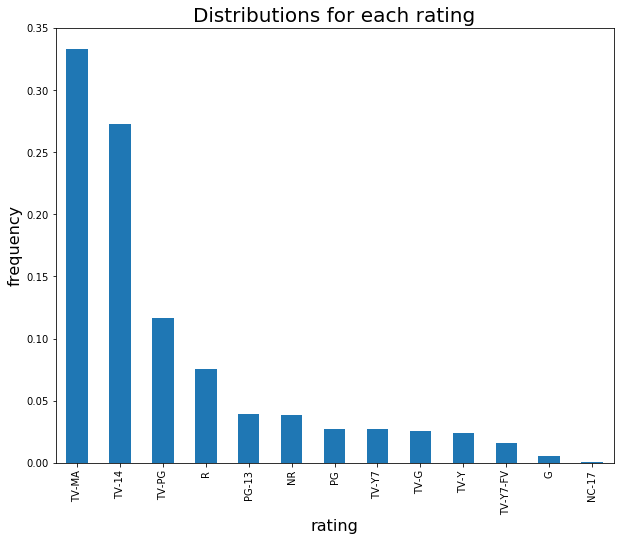

In [9]:
plt.figure(figsize=(10,8))
data['rating'].value_counts(normalize=True).plot.bar()
plt.xlabel("rating", size=16)
plt.ylabel("frequency", size=16)
plt.title("Distributions for each rating", size=20)

Text(0.5, 1.0, 'Distributions of each rating for each type')

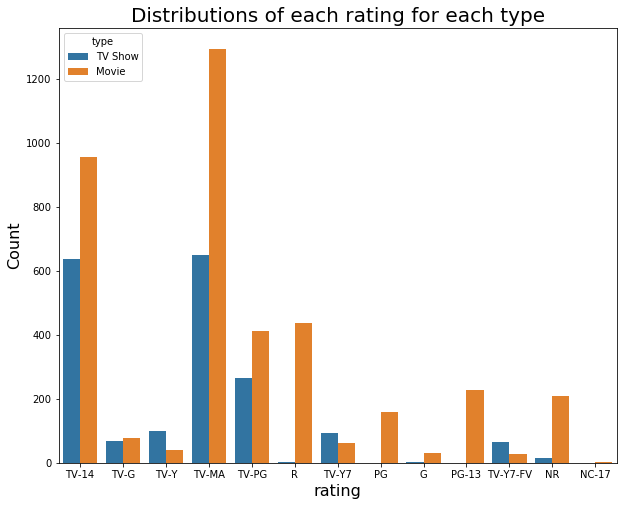

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating', data=data, hue='type')
plt.xlabel("rating", size=16)
plt.ylabel("Count", size=16)
plt.title("Distributions of each rating for each type", size=20)

Text(0.5, 1.0, 'Distributions of each rating for each type')

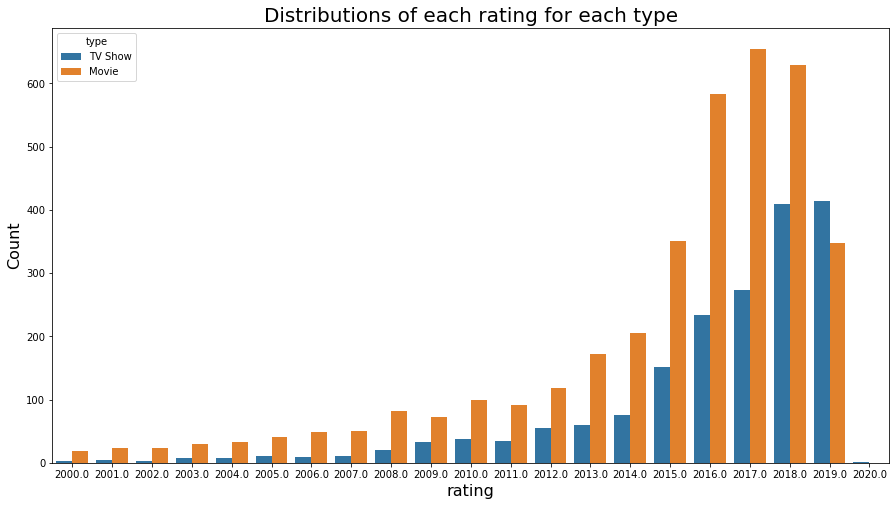

In [26]:
plt.figure(figsize=(15,8))
data_new = data.where(data['release_year'] >= 2000)
sns.countplot(x='release_year', data=data_new, hue='type')
plt.xlabel("year", size=16)
plt.ylabel("Count", size=16)
plt.title("Comparing between types for each year", size=20)

There are more movies released in each year but the number of series is cathing up.

In [38]:
# data.insert(11, 'release_month', "non")
for i in data.index:
    if isinstance(data.loc[i, 'date_added'], str):
        data.loc[i, 'release_month'] = data.loc[i, 'date_added'].split(' ',1)[0]

Text(0.5, 1.0, 'Number of releases categorized by month')

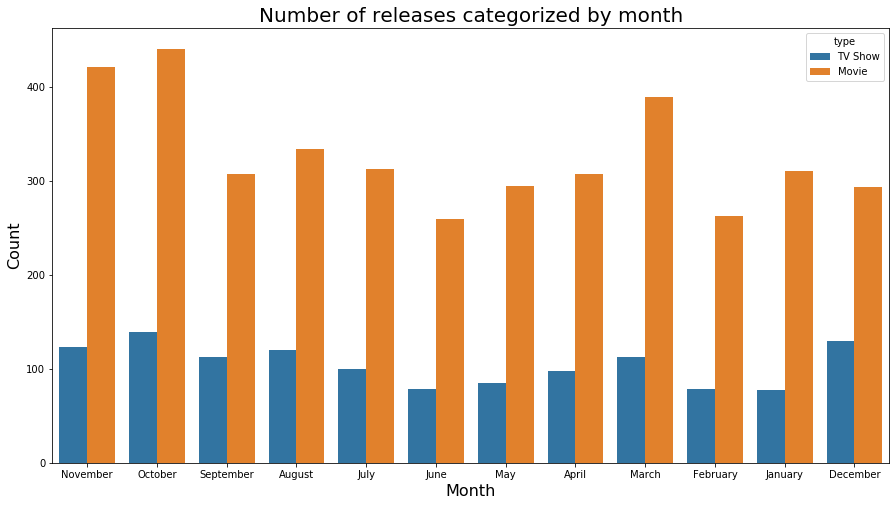

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(x='release_month', data=data.where(data['release_month'] != 'non'), hue='type')
plt.xlabel("Month", size=16)
plt.ylabel("Count", size=16)
plt.title("Number of releases categorized by month", size=20)

Netflix does not seem to have more releases during summer, but it has more releases after schools start.